## PADL Practical: Word2vec embeddings

In [1]:
# Demonstrating word2vec on toy data
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Toy datasets
sentences0 = ["My husky bit me",
             "My husky pulls the sleigh",
             "My dog bit the postman",
              "I ate a pizza with olives",
              "I ate a sandwich with cheese",
              "You ate a hotdog with ketchup",
              "You ate a toast with cheese"
              ]

sentences1 = ["You know Dasher and Dancer and Prancer and Vixen Comet and Cupid and Donner and Blitzen, but do you recall the most famous reindeer of all?",
"Rudolph the Red-Nosed Reindeer Had a very shiny nose And if you ever saw it, You would even say it glows.",
"All of the other reindeer Used to laugh and call him names, They never let poor Rudolph Join in any reindeer games.",
"Then one foggy Christmas Eve Santa came to say: Rudolph, with your nose so bright Will you not guide my sleigh tonight?",
"Then how the reindeer loved him, As they shouted out with glee: Rudolph the Red-Nosed Reindeer, You will go down in history!"]


sentences2 =  ["The itsy bitsy spider went up the water spout.",
              "Down came the rain, and washed the spider out.",
              "Out came the sun, and dried up all the rain.",
              "So, the itsy bitsy spider went up the spout again.",
              "The itsy bitsy spider went up the water spout.",
              "Down came the rain, and washed the spider out.",
              "Out came the sun, and dried up all the rain.",
              "So, the itsy bitsy spider went up the spout again."
           ]

sentences = sentences0 + sentences1 + sentences2

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Number of dimensions for the Word2vec embeddings
#Eacg word is represented as  4-dimensional vector
v_size = 100

# Window size for the Word2vec training
#The model considers 2 words before&after a target word for a context
w_size = 4

# Train Word2Vec model (check the Gensim library for more information)
# https://radimrehurek.com/gensim/auto_examples/index.html
model = Word2Vec(sentences=tokenized_sentences, vector_size=v_size, window=w_size, min_count=1, workers=4)

# Access embeddings: they are stored as KeyedVectors
word_embeddings = model.wv

**Produce the scatterplot of the first 2 components of the word2vec embeddings**

In [34]:
coordX = []
coordY = []
label = []
for key in word_embeddings.index_to_key:
  coordX.append(word_embeddings[key][0])
  coordY.append(word_embeddings[key][1])
  label.append(key)
  print(word_embeddings[key])


[-5.1465112e-04  3.7091973e-04  5.0942483e-03  8.9907134e-03
 -9.2070848e-03 -7.2604408e-03  6.5212515e-03  9.1861244e-03
 -5.1007825e-03 -3.8750118e-03  7.3256250e-03 -1.6499966e-03
 -4.5420020e-03  6.5998770e-03 -4.7834320e-03 -1.9228318e-03
  2.8729863e-03  9.5800875e-04 -8.3715096e-03 -9.7211218e-03
  7.2887475e-03  5.0346558e-03  6.7858594e-03  7.1317994e-04
  6.3521867e-03 -3.4178640e-03 -1.0574205e-03  5.8081765e-03
 -7.6177772e-03 -3.9341035e-03 -7.5283418e-03 -9.6775632e-04
  9.6220020e-03 -7.3954677e-03 -2.3937782e-03 -1.8651258e-03
  8.1002861e-03 -5.9993756e-03  7.3222684e-05 -4.9146167e-03
 -9.6308393e-03  4.9281763e-03 -8.8311648e-03 -4.3808832e-03
  3.3363940e-05 -3.1145351e-04 -7.7121002e-03  9.5467018e-03
  5.1014679e-03  9.3333181e-03 -8.2074646e-03  4.4309353e-03
 -4.0879953e-03  8.1049372e-04  8.4589226e-03 -4.4468278e-03
  4.5189499e-03 -6.8277982e-03 -3.6200869e-03  9.3963901e-03
 -1.4761840e-03  2.9026551e-04 -4.0979609e-03 -7.6399315e-03
 -1.5970805e-03  2.62477

In [35]:
all_coords = np.array([word_embeddings[key] for key in word_embeddings.index_to_key])

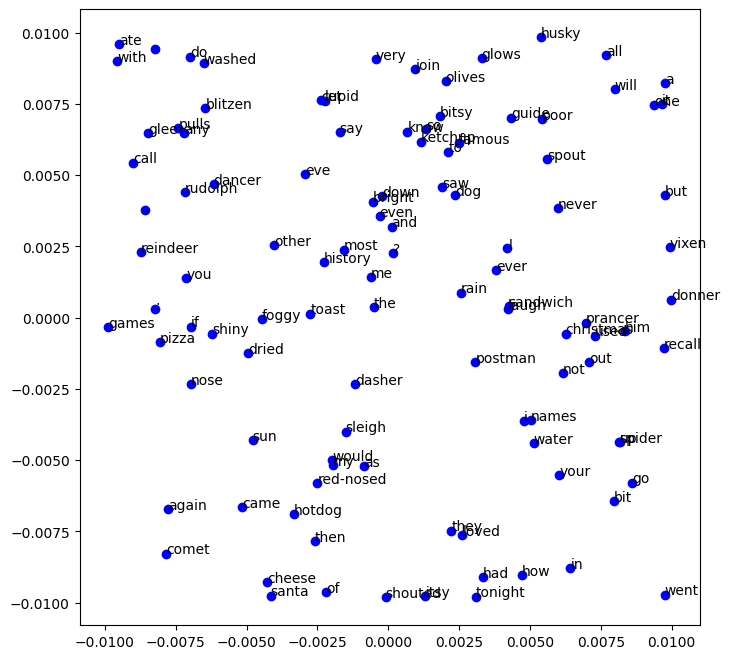

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coordX, coordY, color = 'blue')

for i, txt in enumerate(label):
    ax.annotate(txt, (coordX[i], coordY[i]))

**Test if the Word2vec features are correlated or orthogonal to each other**

In [37]:
from scipy.stats import pearsonr

for i in range(100):
    for j in range(100):
        if i != j and i < j:
            print(
                f"Correlation between component {i} and component {j} is {pearsonr(all_coords[:, i], all_coords[:, j]).statistic}"
            )

            print(
                f"Dot product of component {i} and component {j} is {all_coords[:, i] @ all_coords[:, j]}"
            )

Streaming output truncated to the last 5000 lines.
Correlation between component 28 and component 85 is 0.05229566605936504
Dot product of component 28 and component 85 is 0.00017661607125774026
Correlation between component 28 and component 86 is -0.06051167089149332
Dot product of component 28 and component 86 is -0.00028584167012013495
Correlation between component 28 and component 87 is 0.06626221276259675
Dot product of component 28 and component 87 is 0.00016961291839834303
Correlation between component 28 and component 88 is -0.06833217328156503
Dot product of component 28 and component 88 is -0.00028305817977525294
Correlation between component 28 and component 89 is 0.09681336121535346
Dot product of component 28 and component 89 is 0.00028370736981742084
Correlation between component 28 and component 90 is -0.06247498555637956
Dot product of component 28 and component 90 is -0.00030060630524531007
Correlation between component 28 and component 91 is -0.14258256116512305
Dot p

**Apply PCA to the word embeddings, and plot the PC1 vs PC2 scatterplot (with words as labels).**




In [38]:
# Separate the words (as 'labels') from the embeddings (stored in X)
label = []
X = []
for i, key in enumerate(word_embeddings.index_to_key):
  label.append(key)
  X.append(word_embeddings[key])

np.reshape(X,(-1,v_size))

array([[-0.00051465,  0.00037092,  0.00509425, ..., -0.00709419,
         0.00090522,  0.00635022],
       [-0.00859918,  0.00378418,  0.00518032, ..., -0.00242979,
        -0.00951533,  0.00448074],
       [ 0.00011518,  0.00319604, -0.00680429, ...,  0.00043555,
         0.00820623, -0.00706477],
       ...,
       [ 0.00249423,  0.00611496, -0.00968351, ...,  0.00106497,
        -0.00241906, -0.00346753],
       [-0.0015743 ,  0.00238375,  0.00541631, ..., -0.00706601,
         0.00612925,  0.00726532],
       [ 0.00973082, -0.00105792, -0.00704184, ...,  0.00345504,
        -0.00565362,  0.00581851]], dtype=float32)

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(X)
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)
X_transformed

array([[ 1.00973451, -3.47160395, -0.09083548, ...,  0.16326578,
        -0.16996366, -0.06430179],
       [-1.0213091 ,  0.43360008,  2.62632436, ...,  0.01229863,
         0.11429759,  0.02540757],
       [ 4.34373086,  0.43507136, -2.87444251, ...,  0.18990958,
        -0.01872184, -0.00533269],
       ...,
       [ 0.54658157, -1.65138603, -3.33755783, ...,  0.05987089,
        -0.03575627, -0.04761004],
       [-2.65457389,  1.09867577,  0.95514072, ..., -0.01275265,
        -0.00658866, -0.11250565],
       [ 0.83380458, -3.25997359, -0.89151984, ...,  0.02389074,
         0.04620836,  0.07045823]])

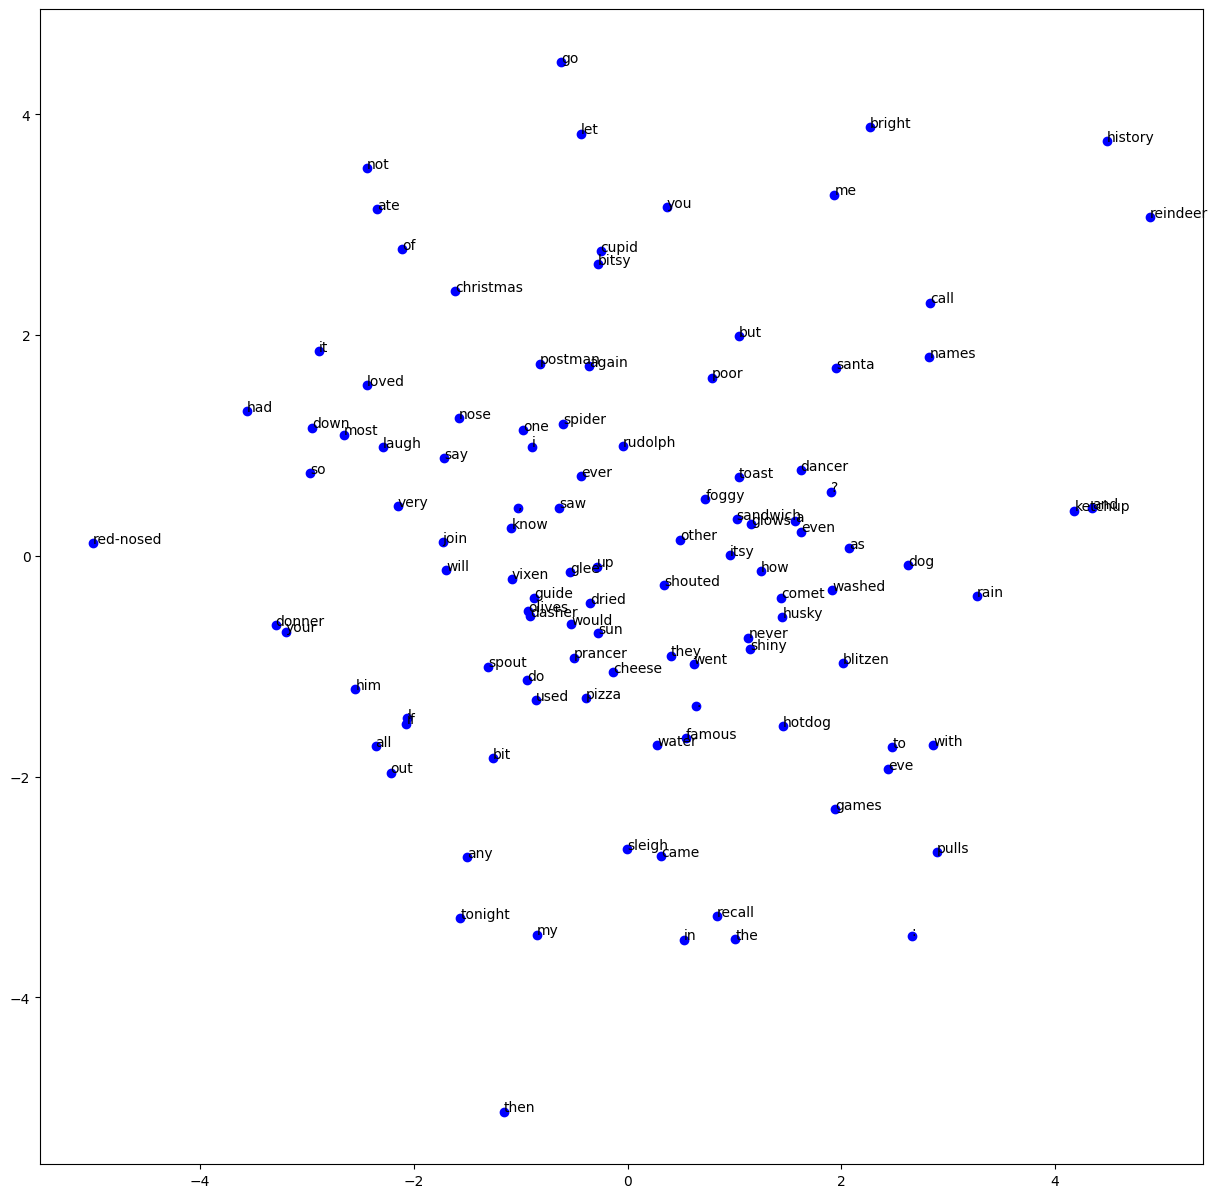

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], color="blue")

for i, txt in enumerate(label):
    ax.text(X_transformed[i, 0], X_transformed[i, 1], txt)

**Experiment** with (1) the choice of dataset (by adding and editing sentences), and with (2) different sizes for the word embedding vectors (vector_size) and (3) the window used to generate the embeddings, and study how they affect the PC scatterplot.



*   Can you find a setup that brings closer words that are close in meaning?
*   Can you find a setup that brings closer words with similar syntactic role, e.g. prepositions (on/at/under/near...)?

